In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 98% 154M/158M [00:03<00:00, 65.0MB/s]
100% 158M/158M [00:03<00:00, 52.7MB/s]


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/covid19-image-dataset.zip

Load and prepare the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_path = "/content/Covid19-dataset/train"
test_path = "/content/Covid19-dataset/test"
batch_size = 32
image_size = (100, 100)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    horizontal_flip=True,
)
test_image_gen = ImageDataGenerator(
    rescale=1./255,
)

In [28]:
train_data = train_image_gen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
)

test_data = test_image_gen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [29]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [30]:
classes_name = ['Covid', 'Normal', 'Viral Pneumonia']

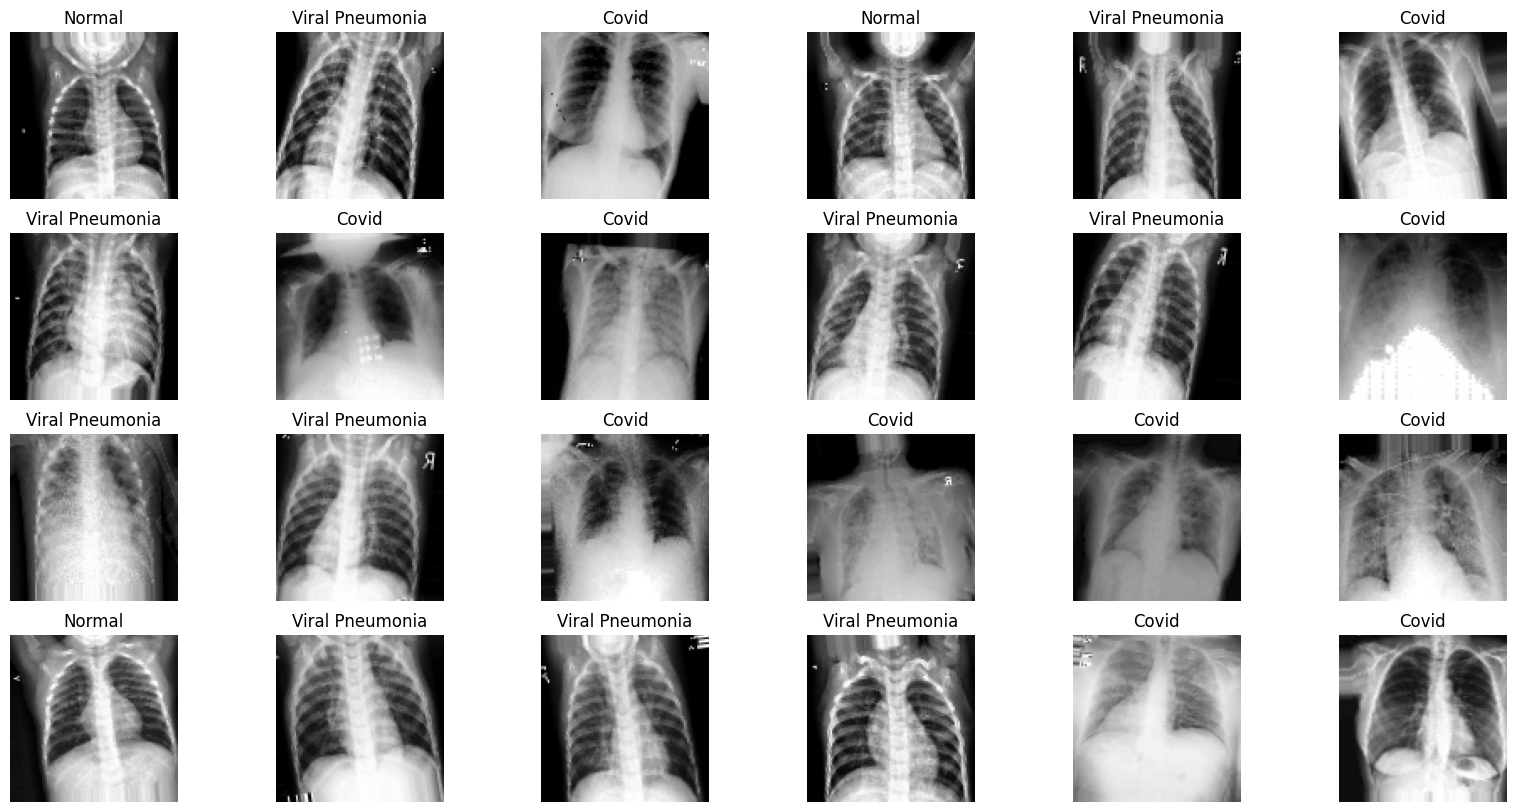

In [31]:
images, labels = next(train_data)

plt.figure(figsize=(20, 10))
for i in range(24):
  plt.subplot(4, 6, i+1)
  plt.imshow(images[i])
  plt.title(classes_name[labels[i].argmax()])
  plt.axis("off")
plt.show()

In [32]:
from tensorflow import keras

In [38]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(100, 100, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(32, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),


    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),

    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(3, activation="softmax")
])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_25 (Ba  (None, 98, 98, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 batch_normalization_26 (Ba  (None, 47, 47, 32)       

In [40]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [41]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
history = model.fit(train_data, epochs=40, validation_data=test_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/40
8/8 [==============================] - 13s 1s/step - loss: 0.5915 - accuracy: 0.7331 - val_loss: 1.1159 - val_accuracy: 0.3030
Epoch 2/40
8/8 [==============================] - 10s 1s/step - loss: 0.3886 - accuracy: 0.8446 - val_loss: 0.9692 - val_accuracy: 0.4242
Epoch 3/40
8/8 [==============================] - 9s 1s/step - loss: 0.3057 - accuracy: 0.9044 - val_loss: 1.1391 - val_accuracy: 0.3939
Epoch 4/40
8/8 [==============================] - 10s 1s/step - loss: 0.2273 - accuracy: 0.8884 - val_loss: 1.7529 - val_accuracy: 0.3939
Epoch 5/40
8/8 [==============================] - 10s 1s/step - loss: 0.2443 - accuracy: 0.9044 - val_loss: 2.6650 - val_accuracy: 0.3939
Epoch 6/40
8/8 [==============================] - 10s 1s/step - loss: 0.1198 - accuracy: 0.9482 - val_loss: 3.0739 - val_accuracy: 0.3939


In [43]:
loss, acc = model.evaluate(test_data)

3/3 [==============================] - 1s 162ms/step - loss: 3.0739 - accuracy: 0.3939


In [44]:
print(f"Loss = {round(loss * 100, 2) }% Accuracy = {round(acc * 100, 2) }%")

Loss = 307.39% Accuracy = 39.39%


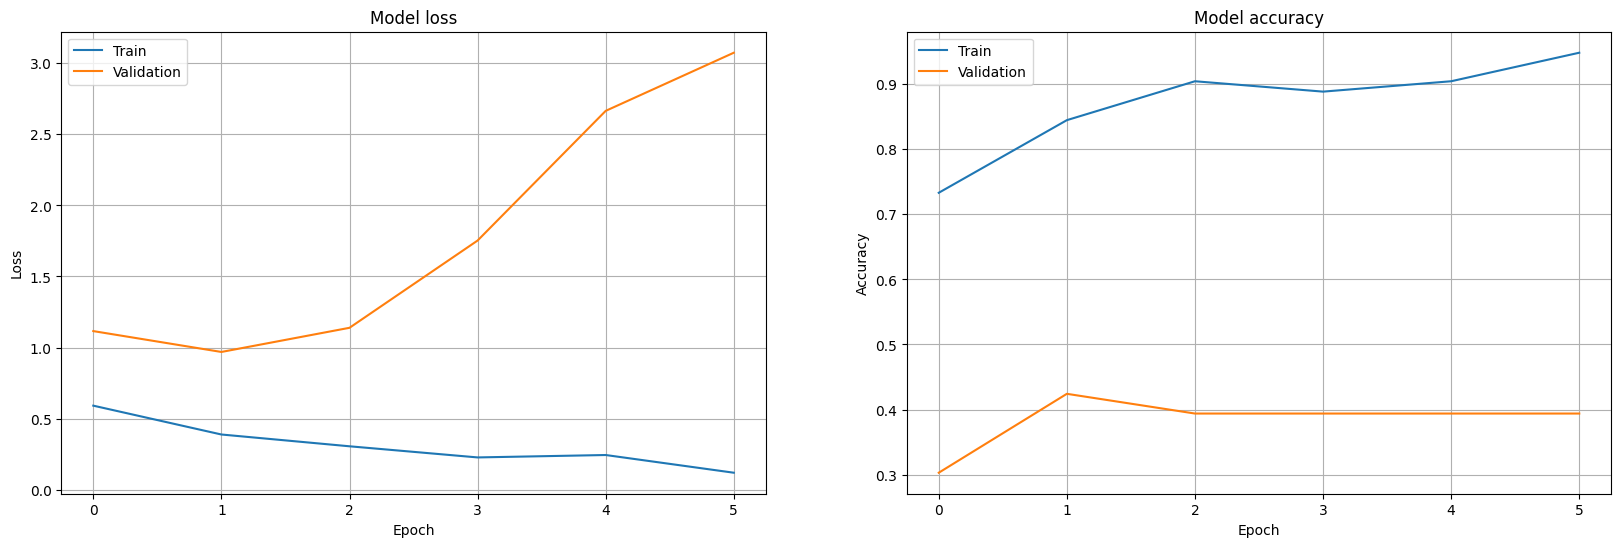

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [73]:
base_model = keras.applications.vgg19.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(100,100,3),
    pooling="max",
    classes=3,
    classifier_activation="softmax"
)

base_model.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [74]:
new_model = keras.Sequential()
new_model.add(base_model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(512, activation='relu'))
new_model.add(keras.layers.Dropout(0.5))
new_model.add(keras.layers.Dense(3, activation='softmax'))

In [75]:
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 20288579 (77.39 MB)
Trainable params: 264195 (1.01 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [76]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [77]:
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [78]:
history = new_model.fit(train_data, epochs=40, validation_data=test_data,  callbacks=[early_stopping], batch_size=batch_size)


Epoch 1/40
8/8 [==============================] - 46s 5s/step - loss: 1.1918 - accuracy: 0.4104 - val_loss: 0.9443 - val_accuracy: 0.5303
Epoch 2/40
8/8 [==============================] - 43s 5s/step - loss: 1.1073 - accuracy: 0.4422 - val_loss: 0.8540 - val_accuracy: 0.6667
Epoch 3/40
8/8 [==============================] - 44s 5s/step - loss: 0.9947 - accuracy: 0.5020 - val_loss: 0.7676 - val_accuracy: 0.7727
Epoch 4/40
8/8 [==============================] - 43s 5s/step - loss: 0.9120 - accuracy: 0.5936 - val_loss: 0.7135 - val_accuracy: 0.8333
Epoch 5/40
8/8 [==============================] - 43s 5s/step - loss: 0.8250 - accuracy: 0.6295 - val_loss: 0.6425 - val_accuracy: 0.8939
Epoch 6/40
8/8 [==============================] - 43s 5s/step - loss: 0.7679 - accuracy: 0.6773 - val_loss: 0.5875 - val_accuracy: 0.9242
Epoch 7/40
8/8 [==============================] - 45s 6s/step - loss: 0.6980 - accuracy: 0.7211 - val_loss: 0.5458 - val_accuracy: 0.9091
Epoch 8/40
8/8 [==================

In [79]:
loss, accuracy = new_model.evaluate(test_data)

3/3 [==============================] - 9s 2s/step - loss: 0.2312 - accuracy: 0.9242


In [80]:
print(f"Loss = {round(loss*100, 2)}%")
print(f"Accuracy = {round(accuracy*100, 2)}%")

Loss = 23.12%
Accuracy = 92.42%


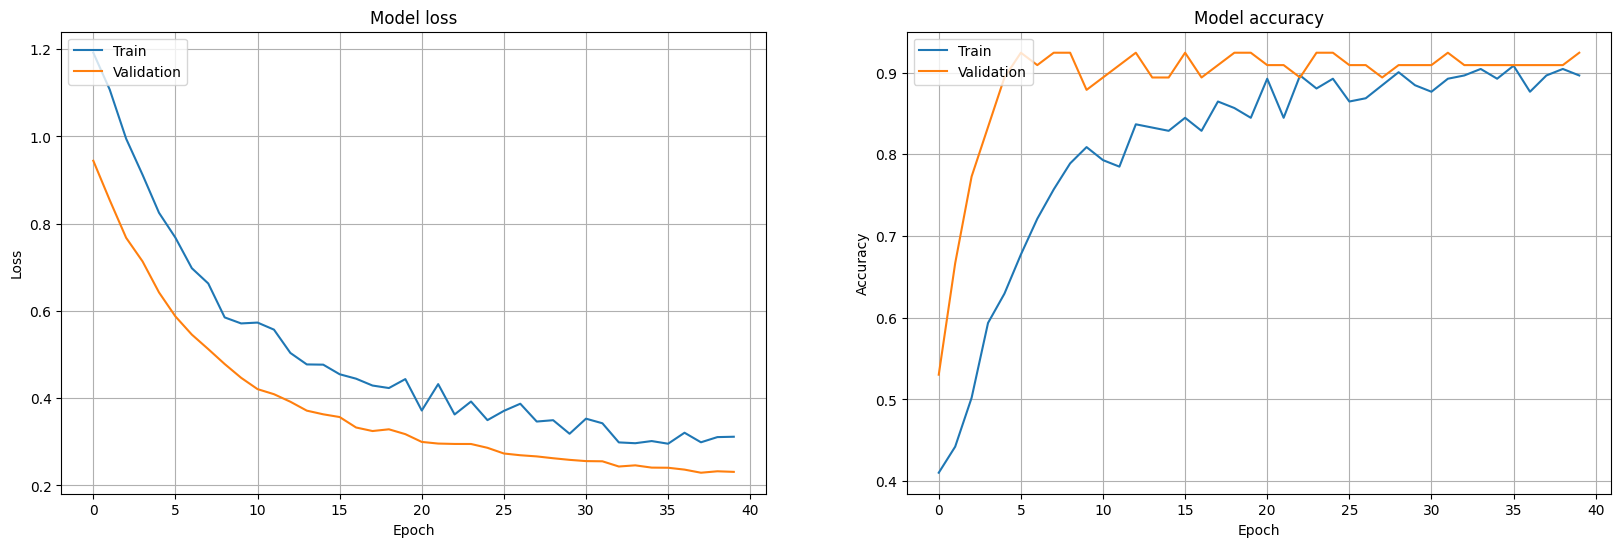

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [71]:
new_model.save("covid_image.keras")